In [16]:
import os
os.chdir('D:\\New\\SIB Zenius\\fp')

In [17]:
os.getcwd()

'D:\\New\\SIB Zenius\\fp'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
topdata = pd.read_csv("datamodel.csv")

In [3]:
topdata.columns

Index(['Unnamed: 0', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_LAST_PHONE_CHANGE',
       'REGION_RATING_CLIENT_W_CITY', 'YEARS_EMPLOYED', 'REGION_RATING_CLIENT',
       'AMT_GOODS_PRICE', 'AMT_BALANCE_MEAN', 'AMT_CREDIT', 'DAYS_BIRTH',
       'FLOORSMAX_MODE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'FLAG_OWN_CAR', 'TARGET'],
      dtype='object')

In [4]:
topdata.shape

(20991, 19)

In [5]:
topdata.head()

,Unnamed: 0,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,YEARS_EMPLOYED,REGION_RATING_CLIENT,AMT_GOODS_PRICE,AMT_BALANCE_MEAN,AMT_CREDIT,DAYS_BIRTH,FLOORSMAX_MODE,NAME_EDUCATION_TYPE,CODE_GENDER,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FLAG_OWN_CAR,TARGET
0,0,0.686505,0.394495,2.747945,2,7.791781,2,450000.0,16901.607273,450000.0,12009,0.1667,Higher education,M,Commercial associate,Laborers,Business Entity Type 3,N,0
1,1,0.700274,0.071055,2.967123,1,18.457534,2,900000.0,178584.459545,900000.0,14751,0.3750,Higher education,F,Working,Core staff,Kindergarten,N,0
2,2,0.707972,0.452534,2.010959,1,3.202740,1,720000.0,239297.514375,891072.0,13830,0.4583,Secondary / secondary special,F,Commercial associate,Realty agents,Other,N,0
3,3,0.678125,0.683269,4.106849,2,9.369863,2,270000.0,71369.232632,270000.0,22881,0.4583,Higher education,M,State servant,Core staff,Government,N,0
4,4,0.746486,0.739412,4.882192,2,11.986301,2,198000.0,1614.429844,260725.5,16282,0.1667,Secondary / secondary special,F,Working,Laborers,Self-employed,Y,0


In [5]:
topdata = topdata.drop(["Unnamed: 0"], axis=1)

In [9]:
topdata.head()

,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,YEARS_EMPLOYED,REGION_RATING_CLIENT,AMT_GOODS_PRICE,AMT_BALANCE_MEAN,AMT_CREDIT,DAYS_BIRTH,FLOORSMAX_MODE,NAME_EDUCATION_TYPE,CODE_GENDER,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FLAG_OWN_CAR,TARGET
0,0.686505,0.394495,2.747945,2,7.791781,2,450000.0,16901.607273,450000.0,12009,0.1667,Higher education,M,Commercial associate,Laborers,Business Entity Type 3,N,0
1,0.700274,0.071055,2.967123,1,18.457534,2,900000.0,178584.459545,900000.0,14751,0.3750,Higher education,F,Working,Core staff,Kindergarten,N,0
2,0.707972,0.452534,2.010959,1,3.202740,1,720000.0,239297.514375,891072.0,13830,0.4583,Secondary / secondary special,F,Commercial associate,Realty agents,Other,N,0
3,0.678125,0.683269,4.106849,2,9.369863,2,270000.0,71369.232632,270000.0,22881,0.4583,Higher education,M,State servant,Core staff,Government,N,0
4,0.746486,0.739412,4.882192,2,11.986301,2,198000.0,1614.429844,260725.5,16282,0.1667,Secondary / secondary special,F,Working,Laborers,Self-employed,Y,0


In [6]:
topdata["TARGET"].value_counts()

0    18984
1     2007
Name: TARGET, dtype: int64

In [11]:
sns.countplot(x='TARGET', data=topdata, palette="Set1")

NameError: name 'sns' is not defined

## Handling Data Imbalance

In [7]:
#oversample
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = topdata[(topdata['TARGET']==0)] 
df_minority = topdata[(topdata['TARGET']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 18984, # to match majority class
                                 random_state=122)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [8]:
df_upsampled["TARGET"].value_counts()

1    18984
0    18984
Name: TARGET, dtype: int64

In [15]:
df_upsampled.shape

(37968, 18)

In [16]:
corr = df_upsampled.corrwith(df_upsampled["TARGET"]).abs().sort_values(ascending=False)
corr_filter = corr[corr>0.0]
corr_filter

TARGET                         1.000000
EXT_SOURCE_2                   0.254835
EXT_SOURCE_3                   0.248493
YEARS_LAST_PHONE_CHANGE        0.147262
REGION_RATING_CLIENT_W_CITY    0.131960
AMT_GOODS_PRICE                0.125837
YEARS_EMPLOYED                 0.125149
REGION_RATING_CLIENT           0.123375
AMT_CREDIT                     0.107933
AMT_BALANCE_MEAN               0.107850
DAYS_BIRTH                     0.091634
FLOORSMAX_MODE                 0.087715
dtype: float64

In [17]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37968 entries, 16032 to 20990
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EXT_SOURCE_2                 37968 non-null  float64
 1   EXT_SOURCE_3                 37968 non-null  float64
 2   YEARS_LAST_PHONE_CHANGE      37968 non-null  float64
 3   REGION_RATING_CLIENT_W_CITY  37968 non-null  int64  
 4   YEARS_EMPLOYED               37968 non-null  float64
 5   REGION_RATING_CLIENT         37968 non-null  int64  
 6   AMT_GOODS_PRICE              37968 non-null  float64
 7   AMT_BALANCE_MEAN             37968 non-null  float64
 8   AMT_CREDIT                   37968 non-null  float64
 9   DAYS_BIRTH                   37968 non-null  int64  
 10  FLOORSMAX_MODE               37968 non-null  float64
 11  NAME_EDUCATION_TYPE          37968 non-null  object 
 12  CODE_GENDER                  37968 non-null  object 
 13  NAME_INCOME_

## ENCODING

In [9]:
# defining feature matrix(X) and response vector(y)
X = df_upsampled.loc[:, df_upsampled.columns != 'TARGET']
y = df_upsampled["TARGET"]

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [10]:
print(X_train.shape, X_test.shape)

(26577, 17) (11391, 17)


In [11]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [12]:
ore = OrdinalEncoder()

In [62]:
ore.fit(X[["CODE_GENDER", "NAME_INCOME_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE", "FLAG_OWN_CAR"]])

OrdinalEncoder()

In [76]:
ordinal_trans = make_column_transformer((OrdinalEncoder(categories = ore.categories_),["CODE_GENDER", "NAME_INCOME_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE", "FLAG_OWN_CAR"]))

In [64]:
ordinal_trans

ColumnTransformer(remainder='passtrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[array(['F', 'M'], dtype=object),
                                                            array(['Commercial associate', 'State servant', 'Working'], dtype=object),
                                                            array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
       'Laborers', 'Low-skill Laborers', 'Mana...
       'Security Ministries', 'Self-employed', 'Services', 'Telecom',
       'Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4',
       'Trade: type 5', 'Trade: type 6', 'Trade: type 7',
       'Transport: type 1', 'Transport: type 2', 'Transport: type 3',
       'Transport: type 4', 'University'], dtype=object),
                                                            array(['N', 'Y'], dtype=object)]),
                                 ['CODE_GENDER', 'NAME_INCOME_TYPE',
                                  'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
                                  'FLAG_OWN_CAR'])])

In [16]:
ohe = OneHotEncoder()

In [17]:
ohe

OneHotEncoder()

In [82]:
ohe.fit(X[["NAME_EDUCATION_TYPE","CODE_GENDER", "NAME_INCOME_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE", "FLAG_OWN_CAR"]])

OneHotEncoder()

In [83]:
onehot_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),["NAME_EDUCATION_TYPE","CODE_GENDER", "NAME_INCOME_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE", "FLAG_OWN_CAR"]),remainder = "passthrough")

In [84]:
ohe.categories_

[array(['Academic degree', 'Higher education', 'Incomplete higher',
        'Lower secondary', 'Secondary / secondary special'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Commercial associate', 'State servant', 'Working'], dtype=object),
 array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
        'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
        'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
        'Private service staff', 'Realty agents', 'Sales staff',
        'Secretaries', 'Security staff', 'Waiters/barmen staff'],
       dtype=object),
 array(['Advertising', 'Agriculture', 'Bank', 'Business Entity Type 1',
        'Business Entity Type 2', 'Business Entity Type 3', 'Cleaning',
        'Construction', 'Culture', 'Electricity', 'Emergency',
        'Government', 'Hotel', 'Housing', 'Industry: type 1',
        'Industry: type 10', 'Industry: type 11', 'Industry: type 12',
        'Industry: type 13', 'Industry: t

In [85]:
onehot_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'], dtype=object),
                                                           array(['F', 'M'], dtype=object),
                                                           array(['Commercial associate', 'State servant', 'Working'], dtype=object),
                                                           array(['Accountants', 'Cleaning...
       'Security Ministries', 'Self-employed', 'Services', 'Telecom',
       'Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4',
       'Trade: type 5', 'Trade: type 6', 'Trade: type 7',
       'Transport: type 1', 'Transport: type 2', 'Transport: type 3',
       'Transport: type 4', 'University'], dtype=object),
                                                           array(['N', 'Y'], dtype=object)]),
                                 ['NAME_EDUCATION_TYPE', 'CODE_GENDER',
                                  'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
                                  'ORGANIZATION_TYPE', 'FLAG_OWN_CAR'])])

In [24]:
# normalize features
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [86]:
data = onehot_trans.fit_transform(X)

In [87]:
data

<37968x98 sparse matrix of type '<class 'numpy.float64'>'
	with 641532 stored elements in Compressed Sparse Row format>

## MODEL BUILDING

Beberapa algoritma yang akan kita uji :
-  Logistic Regression
- Gaussian Naive Bayes
- Decision Tree
- Random Forest
- K-Nearest Neighbor
- Neural Network
- SVM
- AdaBoost
- XGboost


In [29]:
# from sklearn.linear_model import LogisticRegression #logistic regression
# from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
# from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
# from sklearn.neural_network import MLPClassifier #neural network
# from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Logistic Regression

In [42]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [43]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     13256
           1       0.68      0.68      0.68     13321

    accuracy                           0.68     26577
   macro avg       0.68      0.68      0.68     26577
weighted avg       0.68      0.68      0.68     26577



In [44]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_log))
print("Precision :", precision_score(y_train, y_train_pred_log, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_log, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_log))

Akurasi : 0.6779546224178801
Precision : 0.6779531097336975
Recall : 0.6779537083419545
AUC : 0.6779537083419545


In [45]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5728
           1       0.67      0.67      0.67      5663

    accuracy                           0.67     11391
   macro avg       0.67      0.67      0.67     11391
weighted avg       0.67      0.67      0.67     11391



In [47]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_log))
print("Precision :", precision_score(y_test, y_test_pred_log, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_log, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_log))

Akurasi : 0.6717584057589325
Precision : 0.6717490744671307
Recall : 0.6717512241325393
AUC : 0.6717512241325393


## Naive Bayes

In [48]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [49]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.68      0.03      0.06     13256
           1       0.51      0.98      0.67     13321

    accuracy                           0.51     26577
   macro avg       0.59      0.51      0.37     26577
weighted avg       0.59      0.51      0.37     26577



In [50]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_gnb))
print("Precision :", precision_score(y_train, y_train_pred_gnb, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_gnb, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_gnb))

Akurasi : 0.5100274673589946
Precision : 0.5920605914688251
Recall : 0.508865026303525
AUC : 0.5088650263035251


In [51]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))


Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5728
           1       0.00      0.00      0.00      5663

    accuracy                           0.50     11391
   macro avg       0.25      0.50      0.33     11391
weighted avg       0.25      0.50      0.34     11391



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_gnb))
print("Precision :", precision_score(y_test, y_test_pred_gnb, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_gnb, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_gnb))

Akurasi : 0.5028531296637696
Precision : 0.2514265648318848
Recall : 0.5
AUC : 0.5


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [53]:
# train the model
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier(random_state=42)


In [54]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13256
           1       1.00      1.00      1.00     13321

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577



In [55]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_dt))
print("Precision :", precision_score(y_train, y_train_pred_dt, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_dt, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_dt))

Akurasi : 1.0
Precision : 1.0
Recall : 1.0
AUC : 1.0


In [56]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5728
           1       0.87      0.88      0.87      5663

    accuracy                           0.87     11391
   macro avg       0.87      0.87      0.87     11391
weighted avg       0.87      0.87      0.87     11391



In [57]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_dt))
print("Precision :", precision_score(y_test, y_test_pred_dt, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_dt, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_dt))

Akurasi : 0.8737599859538232
Precision : 0.8737657848065716
Recall : 0.8737769156249968
AUC : 0.8737769156249968


>1, train: 0.602, test: 0.596
>2, train: 0.636, test: 0.632
>3, train: 0.643, test: 0.638
>4, train: 0.650, test: 0.643
>5, train: 0.660, test: 0.652
>6, train: 0.676, test: 0.656
>7, train: 0.704, test: 0.682
>8, train: 0.726, test: 0.697
>9, train: 0.755, test: 0.713
>10, train: 0.783, test: 0.732
>11, train: 0.806, test: 0.746
>12, train: 0.836, test: 0.770
>13, train: 0.857, test: 0.782
>14, train: 0.877, test: 0.799
>15, train: 0.895, test: 0.809
>16, train: 0.913, test: 0.820
>17, train: 0.929, test: 0.831
>18, train: 0.942, test: 0.842
>19, train: 0.950, test: 0.847


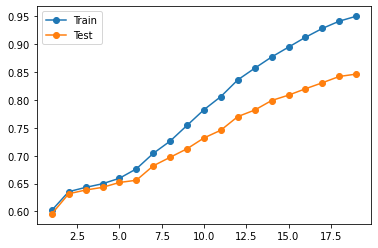

In [58]:
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 20)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### Hyperparameter Tuning for Decision Tree

In [59]:
# train the model
dt_tuning = DecisionTreeClassifier(random_state=123).fit(X_train,y_train)
print(dt_tuning)

DecisionTreeClassifier(random_state=123)


In [60]:
from sklearn.model_selection import GridSearchCV
params =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]}

# Create gridsearch instance
grid = GridSearchCV(estimator=dt_tuning,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)
# Fit the model
grid.fit(X_train, y_train)

# Assess the score

grid.best_score_, grid.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .................. max_depth=1, min_samples_leaf=1, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.9s finished


(0.638108232636762, {'max_depth': 3, 'min_samples_leaf': 1})

In [61]:
dt_best = DecisionTreeClassifier(max_depth= 3, min_samples_leaf=1, random_state=42).fit(X_train,y_train)
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [62]:
# predict data train
y_train_pred_dt = dt_best.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.64      0.67      0.65     13256
           1       0.65      0.62      0.64     13321

    accuracy                           0.64     26577
   macro avg       0.64      0.64      0.64     26577
weighted avg       0.64      0.64      0.64     26577



In [63]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_dt))
print("Precision :", precision_score(y_train, y_train_pred_dt, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_dt, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_dt))

Akurasi : 0.6432629717424841
Precision : 0.6436201195410398
Recall : 0.6433198256667442
AUC : 0.6433198256667441


In [64]:
# predict data test
y_test_pred_dt = dt_best.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      5728
           1       0.64      0.61      0.63      5663

    accuracy                           0.64     11391
   macro avg       0.64      0.64      0.64     11391
weighted avg       0.64      0.64      0.64     11391



In [65]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_dt))
print("Precision :", precision_score(y_test, y_test_pred_dt, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_dt, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_dt))

Akurasi : 0.6384865244491265
Precision : 0.6386748450386728
Recall : 0.6383525182331256
AUC : 0.6383525182331256


## Random Forest

In [97]:
# train the model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True).fit(X_train, y_train)
print(rf_model)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)


In [98]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_rf))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     13256
           1       0.70      0.71      0.70     13321

    accuracy                           0.70     26577
   macro avg       0.70      0.70      0.70     26577
weighted avg       0.70      0.70      0.70     26577



In [99]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_rf))
print("Precision :", precision_score(y_train, y_train_pred_rf, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_rf, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_rf))

Akurasi : 0.6999285096135757
Precision : 0.6999760460428095
Recall : 0.6999067453628764
AUC : 0.6999067453628764


In [100]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      5728
           1       0.69      0.70      0.69      5663

    accuracy                           0.69     11391
   macro avg       0.69      0.69      0.69     11391
weighted avg       0.69      0.69      0.69     11391



In [101]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_rf))
print("Precision :", precision_score(y_test, y_test_pred_rf, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_rf, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_rf))

Akurasi : 0.6916864191028005
Precision : 0.6917636067636068
Recall : 0.6917324872715864
AUC : 0.6917324872715865


### Hyperparameter Tuning for Random Forest

In [140]:
rf_best = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True).fit(X_train, y_train)


In [119]:
rf_pipe = make_pipeline(onehot_trans, StandardScaler(with_mean=False), RandomForestClassifier())

In [161]:
print(rf_clf.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'randomforestclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__max_categories', 'columntransformer__onehotencoder__min_frequency', 'columntransformer__onehotencoder__sparse', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'r

In [134]:
sorted(rf_pipe.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__onehotencoder',
 'columntransformer__onehotencoder__categories',
 'columntransformer__onehotencoder__drop',
 'columntransformer__onehotencoder__dtype',
 'columntransformer__onehotencoder__handle_unknown',
 'columntransformer__onehotencoder__max_categories',
 'columntransformer__onehotencoder__min_frequency',
 'columntransformer__onehotencoder__sparse',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__verbose_feature_names_out',
 'memory',
 'randomforestclassifier',
 'randomforestclassifier__bootstrap',
 'randomforestclassifier__ccp_alpha',
 'randomforestclassifier__class_weight',
 'randomforestclassifier__criterion',
 'randomforestclassifier__max_depth',
 'randomforestclassifier__max_features',
 'randomforestclassifier__max_leaf_nodes',
 'randomforestclassifier_

In [138]:
pipe = make_pipeline(StandardScaler(with_mean=False), rf_best)

In [130]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_best,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

In [144]:
y_train_pred_pipe_rf = model_pipe.predict(X_train)

In [145]:
print(classification_report(y_train, y_train_pred_pipe_rf))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     13256
           1       0.70      0.71      0.70     13321

    accuracy                           0.70     26577
   macro avg       0.70      0.70      0.70     26577
weighted avg       0.70      0.70      0.70     26577



In [105]:
grid_search.best_score_

0.9001767691867927

In [106]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)

In [171]:
# predict data train
y_train_pred_rf = rf_pipe.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_rf))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     13256
           1       0.95      0.98      0.97     13321

    accuracy                           0.97     26577
   macro avg       0.97      0.97      0.97     26577
weighted avg       0.97      0.97      0.97     26577



In [172]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_rf))
print("Precision :", precision_score(y_train, y_train_pred_rf, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_rf, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_rf))

Akurasi : 0.9667757835722617
Precision : 0.967211346420802
Recall : 0.9667396032111235
AUC : 0.9667396032111236


In [173]:
# predict data test
y_test_pred_rf = rf_pipe.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5728
           1       0.90      0.96      0.93      5663

    accuracy                           0.92     11391
   macro avg       0.93      0.92      0.92     11391
weighted avg       0.93      0.92      0.92     11391



In [174]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_rf))
print("Precision :", precision_score(y_test, y_test_pred_rf, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_rf, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_rf))

Akurasi : 0.9237117022210517
Precision : 0.9257193134952101
Recall : 0.9239121072343557
AUC : 0.9239121072343557


## KNN

In [71]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [72]:
# predit data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))


Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     13256
           1       0.83      0.99      0.90     13321

    accuracy                           0.89     26577
   macro avg       0.91      0.89      0.89     26577
weighted avg       0.91      0.89      0.89     26577



In [73]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_knn))
print("Precision :", precision_score(y_train, y_train_pred_knn, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_knn, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_knn))

Akurasi : 0.8924634082101065
Precision : 0.9096597973230394
Recall : 0.8922133782439161
AUC : 0.892213378243916


In [74]:
# predit data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      5728
           1       0.76      0.98      0.86      5663

    accuracy                           0.84     11391
   macro avg       0.87      0.84      0.83     11391
weighted avg       0.87      0.84      0.83     11391



In [75]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_knn))
print("Precision :", precision_score(y_test, y_test_pred_knn, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_knn, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_knn))

Akurasi : 0.8370643490474936
Precision : 0.8651509980003941
Recall : 0.8378555712273239
AUC : 0.837855571227324


## Neural Network

In [76]:
# train the model
nn_model = MLPClassifier().fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
# predit data train
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     13256
           1       0.93      0.98      0.96     13321

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



In [78]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_nn))
print("Precision :", precision_score(y_train, y_train_pred_nn, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_nn, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_nn))

Akurasi : 0.9566542499153403
Precision : 0.9579933402180618
Recall : 0.9565892053045869
AUC : 0.9565892053045868


In [79]:
# predit data test
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

Classification Report Testing Model (Neural Network):
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5728
           1       0.85      0.96      0.90      5663

    accuracy                           0.89     11391
   macro avg       0.90      0.89      0.89     11391
weighted avg       0.90      0.89      0.89     11391



In [80]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_nn))
print("Precision :", precision_score(y_test, y_test_pred_nn, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_nn, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_nn))

Akurasi : 0.8932490562724958
Precision : 0.8992028433120446
Recall : 0.893600260487315
AUC : 0.8936002604873149


## SVM

In [81]:
# train the model
svm = SVC().fit(X_train, y_train)

In [82]:
# predit data train
y_train_pred_svm = svm.predict(X_train)

# print classification report
print('Classification Report Training Model (SVM):')
print(classification_report(y_train, y_train_pred_svm))

Classification Report Training Model (SVM):
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     13256
           1       0.75      0.83      0.79     13321

    accuracy                           0.78     26577
   macro avg       0.78      0.78      0.78     26577
weighted avg       0.78      0.78      0.78     26577



In [83]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_svm))
print("Precision :", precision_score(y_train, y_train_pred_svm, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_svm, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_svm))

Akurasi : 0.7775143921435828
Precision : 0.7802302133639432
Recall : 0.7773929691920367
AUC : 0.7773929691920367


In [84]:
# predit data test
y_test_pred_svm = svm.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_svm))

Classification Report Testing Model (Neural Network):
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      5728
           1       0.72      0.80      0.76      5663

    accuracy                           0.75     11391
   macro avg       0.75      0.75      0.75     11391
weighted avg       0.75      0.75      0.75     11391



In [85]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_svm))
print("Precision :", precision_score(y_test, y_test_pred_svm, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_svm, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_svm))

Akurasi : 0.7463787200421386
Precision : 0.7496324109505506
Recall : 0.7466965870292016
AUC : 0.7466965870292017


## Ada Boost

In [86]:
# train the model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=500).fit(X_train, y_train)

In [88]:
# predit data train
y_train_pred_ab = ab.predict(X_train)
# print classification report
print('Classification Report Training Model (AdaBoost):')
print(classification_report(y_train, y_train_pred_ab))

Classification Report Training Model (AdaBoost):
              precision    recall  f1-score   support

           0       0.72      0.71      0.72     13256
           1       0.72      0.73      0.72     13321

    accuracy                           0.72     26577
   macro avg       0.72      0.72      0.72     26577
weighted avg       0.72      0.72      0.72     26577



In [89]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_ab))
print("Precision :", precision_score(y_train, y_train_pred_ab, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_ab, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_ab))

Akurasi : 0.7187793957181021
Precision : 0.7188091582221071
Recall : 0.7187626215308303
AUC : 0.7187626215308303


In [90]:
# predit data test
y_test_pred_ab = ab.predict(X_test)

# print classification report
print('Classification Report Testing Model (AdaBoost):')
print(classification_report(y_test, y_test_pred_ab))

Classification Report Testing Model (AdaBoost):
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      5728
           1       0.69      0.67      0.68      5663

    accuracy                           0.68     11391
   macro avg       0.68      0.68      0.68     11391
weighted avg       0.68      0.68      0.68     11391



In [91]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_ab))
print("Precision :", precision_score(y_test, y_test_pred_ab, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_ab, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_ab))

Akurasi : 0.684487753489597
Precision : 0.6845212435926114
Recall : 0.6844273835501842
AUC : 0.6844273835501841


## XGBoost

In [92]:
from xgboost import XGBClassifier
xb = XGBClassifier(n_estimators=50).fit(X_train, y_train)

In [93]:
# predit data train
y_train_pred_xb = xb.predict(X_train)
# print classification report
print('Classification Report Training Model (XGBoost):')
print(classification_report(y_train, y_train_pred_xb))

Classification Report Training Model (XGBoost):
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     13256
           1       0.86      0.92      0.89     13321

    accuracy                           0.88     26577
   macro avg       0.89      0.88      0.88     26577
weighted avg       0.89      0.88      0.88     26577



In [94]:
print("Akurasi :", accuracy_score(y_train, y_train_pred_xb))
print("Precision :", precision_score(y_train, y_train_pred_xb, average='macro'))
print("Recall :", recall_score(y_train, y_train_pred_xb, average='macro'))
print("AUC :", roc_auc_score(y_train, y_train_pred_xb))

Akurasi : 0.8830944049365993
Precision : 0.8852507936748808
Recall : 0.8830032454507444
AUC : 0.8830032454507445


In [95]:
# predit data test
y_test_pred_xb = xb.predict(X_test)

# print classification report
print('Classification Report Testing Model (AdaBoost):')
print(classification_report(y_test, y_test_pred_xb))

Classification Report Testing Model (AdaBoost):
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      5728
           1       0.79      0.81      0.80      5663

    accuracy                           0.80     11391
   macro avg       0.80      0.80      0.80     11391
weighted avg       0.80      0.80      0.80     11391



In [96]:
print("Akurasi :", accuracy_score(y_test, y_test_pred_xb))
print("Precision :", precision_score(y_test, y_test_pred_xb, average='macro'))
print("Recall :", recall_score(y_test, y_test_pred_xb, average='macro'))
print("AUC :", roc_auc_score(y_test, y_test_pred_xb))

Akurasi : 0.7998419805109297
Precision : 0.8000339250269242
Recall : 0.7999116089247365
AUC : 0.7999116089247363


## FINAL MODEL & PIPELINE

In [168]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,min_samples_leaf=5,n_estimators=200, oob_score=True)


In [169]:
rf_pipe = make_pipeline(onehot_trans, StandardScaler(with_mean=False),rf)

In [170]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'], dtype=object),
                                                                            array(['F', 'M'], dtype=object),
                                                                            array(['Commercial associate', 'State servant', 'Working'], dtype=o...
       'Transport: type 4', 'University'], dtype=object),
                                                                            array(['N', 'Y'], dtype=object)]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'CODE_GENDER',
                                                   'NAME_INCOME_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'ORGANIZATION_TYPE',
                                                   'FLAG_OWN_CAR'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=5,
                                        n_estimators=200, n_jobs=-1,
                                        oob_score=True, random_state=42))])

In [177]:
import joblib


In [179]:
joblib.dump(rf_pipe, open("rf_model.pkl", "wb"))

In [180]:
    df = pd.DataFrame(columns=['EXT_SOURCE_2',
                            'EXT_SOURCE_3', 
                            'YEARS_LAST_PHONE_CHANGE',
                            'REGION_RATING_CLIENT_W_CITY', 
                            'YEARS_EMPLOYED',
                            'REGION_RATING_CLIENT',
                            'AMT_GOODS_PRICE',
                            'AMT_BALANCE_MEAN',
                            'AMT_CREDIT',
                            'DAYS_BIRTH',
                            'FLOORSMAX_MODE',
                            'NAME_EDUCATION_TYPE',
                            'CODE_GENDER',
                            'NAME_INCOME_TYPE',
                            'OCCUPATION_TYPE',
                            'ORGANIZATION_TYPE',
                            'FLAG_OWN_CAR'],
                 data=np.array([0.6865047975453018,0.39449540531239935,2.7479452054794513,2,7.791780821917808,2,450000.0,16901.607272727277,450000.0,12009,0.1667,"Higher education","M","Commercial associate","Laborers","Business Entity Type 3","N"]).reshape(1, 17))

In [182]:
rf_pipe.predict(df)

array([0], dtype=int64)